In [9]:
import pandas as pd
import xgboost as xgb
from sklearn import metrics 
from sklearn import preprocessing
def run(fold):
    df = pd.read_csv("cat_train_folds.csv")
    features = [f for f in df.columns if f not in ("id", "target", "kfold") ]
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE") 
    for col in features:
        # 标签编码
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])

    df_train = df[df.kfold != fold].reset_index(drop=True) 
    df_valid = df[df.kfold == fold].reset_index(drop=True) 
    x_train = df_train[features].values
    x_valid = df_valid[features].values
    # XGBoost模型
    model = xgb.XGBClassifier(
        n_jobs=-1, 
        max_depth=4, 
        n_estimators=360)
    model.fit(x_train, df_train.target.values)
    valid_preds = model.predict_proba(x_valid)[:, 1]
    train_preds = model.predict_proba(x_train)[:, 1] 
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    auc1 = metrics.roc_auc_score(df_train.target.values,train_preds)
    print(auc)
if __name__ == "__main__":
    nums = [i*20+100 for i in range(21)]
    list1 = []
    depths = [i+1 for i in range(10)]
    for fold in range(5):
        run(fold)

0.7739411202517934
0.7754002475610875
0.7722770186727584
0.7739485584286537
0.773807495881879


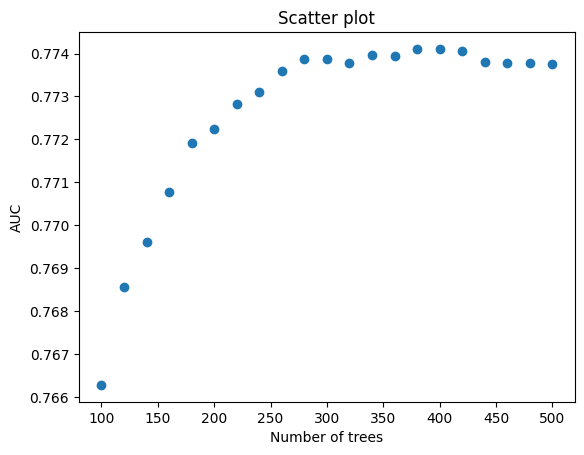

In [8]:
import matplotlib.pyplot as plt
plt.scatter(nums,list1)
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.title('Scatter plot')
plt.show()

In [10]:
df = pd.read_csv("cat_test.csv")

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')